In [1]:
# Dependencies and Setup
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from splinter.exceptions import ElementDoesNotExist
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#insert the website link that it is going to scrap
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [3]:
#using read_html function in Pandas to scrape all the existing tables from a link
table = pd.read_html(url)

### Q.4: Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website.

In [4]:
#convert to dataframe
df = table[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Q.5: Examine the data types of all the DataFrame columns. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.

In [5]:
#checking the data type of each column within the dataframe
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
#converting terrestrial date column from object to datatime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], infer_datetime_format=True)

In [7]:
#checking data type again to make sure the date column has been converted correctly.
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Q.6: How many months exist on Mars?

In [8]:
#Using max function to find out the number of months it has in the data
number_of_months = df['month'].nunique()
print (f'Number of months exist on Mars is: {number_of_months}')

Number of months exist on Mars is: 12


### Q.7: How many Martian (and not Earth) days' worth of data exist in the scraped dataset?

In [9]:
martian_days = df['sol'].nunique()
print (f'Number of martian days worth of data:  {martian_days}')

Number of martian days worth of data:  1867


### Q.8: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

In [10]:
#average daily temperature of all the months:
temp_avg = df.groupby(df['month']).mean()['min_temp']
temp_avg = pd.DataFrame(temp_avg)
temp_avg

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


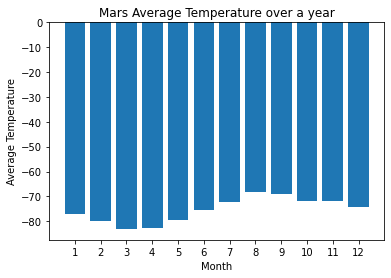

In [11]:
#Plot a bar chart
x_axis = temp_avg.index
plt.bar(x_axis, temp_avg['min_temp'], align='center')
plt.xticks(x_axis)
plt.xlabel ('Month')
plt.ylabel ("Average Temperature")
plt.title ('Mars Average Temperature over a year')
plt.show()

Based on the above bar chart, the warmest month on Mars is August and the coldest month is Apr 

### Q8: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

In [12]:
#### Atmospheric Avg.
atmosphere_avg = df.groupby(df['month']).mean()['pressure']
atmosphere_avg = pd.DataFrame(atmosphere_avg)
atmosphere_avg


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


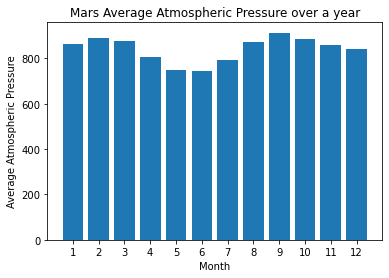

In [13]:
#Plot a bar chart
x_month = temp_avg.index
plt.bar(x_month, atmosphere_avg['pressure'], align='center')
plt.xticks(x_month)
plt.xlabel ('Month')
plt.ylabel ("Average Atmospheric Pressure")
plt.title ('Mars Average Atmospheric Pressure over a year')
plt.show()

Based on the above bar chart, June has the lowest atmospheric presure while September has the highest atmospheric pressure on Mars

#### About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

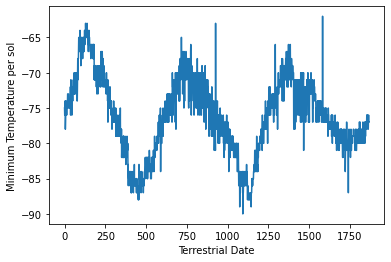

In [14]:
df.min_temp.plot()
plt.xlabel ('Terrestrial Date')
plt.ylabel ("Minimum Temperature per sol")
plt.show()

Based on the above diagram, the distance between 2 peak of minimum temperature is in between 750 days and 1420 days or 670 Earth days in total exist in Martian year. So, 1 year on Mars is about 1.8 years on Earth (approx.)

In [16]:
#export data to a csv file
df.to_csv ('Mars_database.csv')